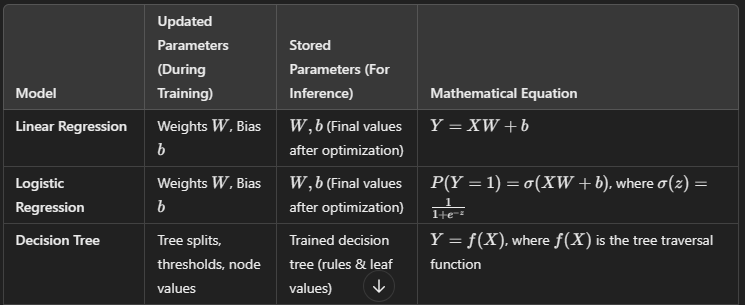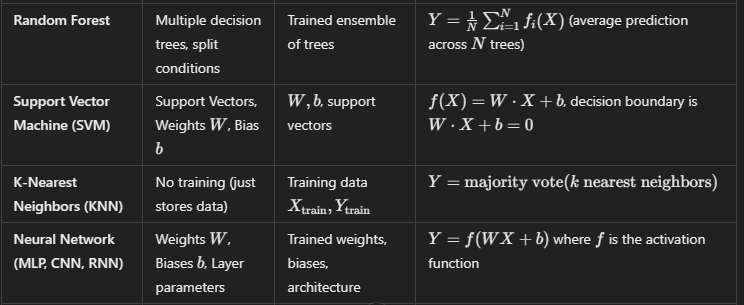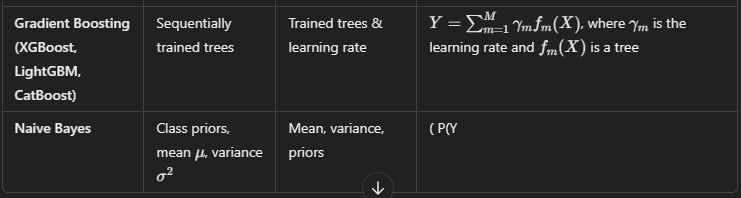

Kmeans clustering  |  Centroids     |      Centroids       |      euclideans distances  

Linear Regression Equation: Y = 2.00X + 0.00
Logistic Regression Equation: P(Y=1) = sigmoid(1.05X + -2.54)
Decision Tree: Trained with 3 nodes.
Random Forest: Trained with 5 trees.
SVM Decision Boundary: 1.00X + -2.50 = 0
KNN: Stores training data.
Neural Network: Trained with 1 input neurons.
XGBoost: Trained with None estimators.
Naive Bayes: Class priors [0.4 0.6], Mean [[1.5]
 [4. ]]


d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


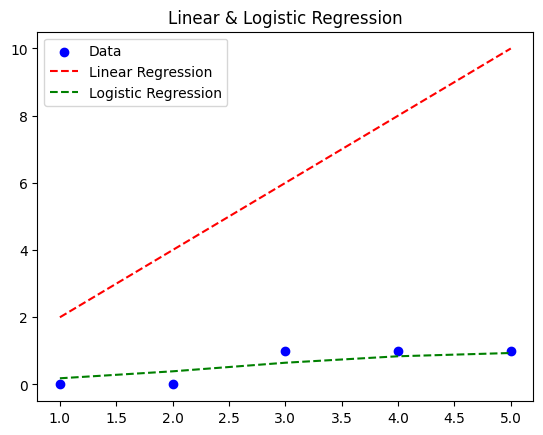

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# Generate synthetic data
X = np.array([[1], [2], [3], [4], [5]])
y_reg = np.array([2, 4, 6, 8, 10])  # Linear target (y = 2x)
y_cls = np.array([0, 0, 1, 1, 1])  # Classification target

# === 1. LINEAR REGRESSION ===
lin_reg = LinearRegression()
lin_reg.fit(X, y_reg)
W_lin, b_lin = lin_reg.coef_[0], lin_reg.intercept_
print(f"Linear Regression Equation: Y = {W_lin:.2f}X + {b_lin:.2f}")

# === 2. LOGISTIC REGRESSION ===
log_reg = LogisticRegression()
log_reg.fit(X, y_cls)
W_log, b_log = log_reg.coef_[0][0], log_reg.intercept_[0]
print(f"Logistic Regression Equation: P(Y=1) = sigmoid({W_log:.2f}X + {b_log:.2f})")

# === 3. DECISION TREE ===
tree = DecisionTreeClassifier()
tree.fit(X, y_cls)
print(f"Decision Tree: Trained with {tree.tree_.node_count} nodes.")

# === 4. RANDOM FOREST ===
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X, y_cls)
print(f"Random Forest: Trained with {len(rf.estimators_)} trees.")

# === 5. SUPPORT VECTOR MACHINE (SVM) ===
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X, y_cls)
W_svm, b_svm = svm_model.coef_[0][0], svm_model.intercept_[0]
print(f"SVM Decision Boundary: {W_svm:.2f}X + {b_svm:.2f} = 0")

# === 6. K-NEAREST NEIGHBORS (KNN) ===
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_cls)
print(f"KNN: Stores training data.")

# === 7. NEURAL NETWORK (MLP) ===
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500)
mlp.fit(X, y_cls)
print(f"Neural Network: Trained with {mlp.coefs_[0].shape[0]} input neurons.")

# === 8. GRADIENT BOOSTING (XGBOOST) ===
xgb = XGBClassifier()
xgb.fit(X, y_cls)
print(f"XGBoost: Trained with {xgb.n_estimators} estimators.")

# === 9. NAIVE BAYES ===
nb = GaussianNB()
nb.fit(X, y_cls)
print(f"Naive Bayes: Class priors {nb.class_prior_}, Mean {nb.theta_}") # , Variance {nb.sigma_}

# === VISUALIZATION ===
plt.scatter(X, y_cls, label="Data", color="blue")
plt.plot(X, lin_reg.predict(X), label="Linear Regression", linestyle="dashed", color="red")
plt.plot(X, log_reg.predict_proba(X)[:, 1], label="Logistic Regression", linestyle="dashed", color="green")
plt.legend()
plt.title("Linear & Logistic Regression")
plt.show()


d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


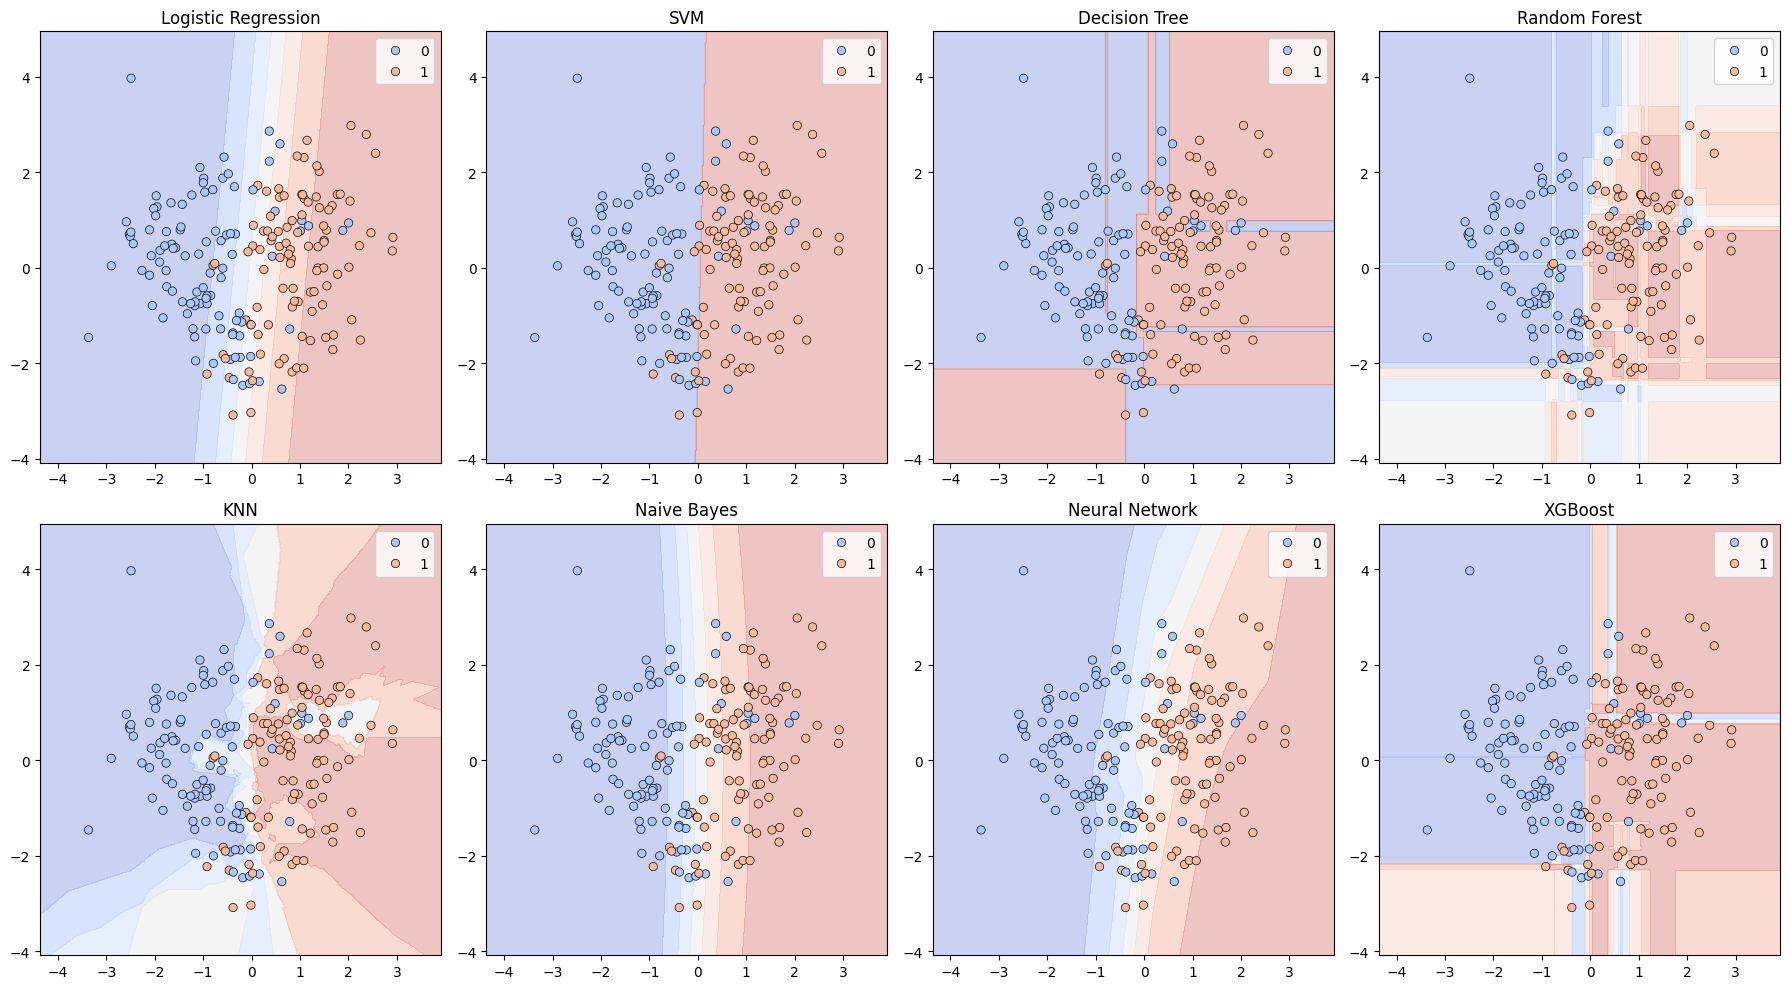

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# === 1. Generate synthetic dataset ===
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Define models ===
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# === 3. Train models ===
for name, model in models.items():
    model.fit(X_train, y_train)

# === 4. Decision boundary plotting function ===
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get model predictions
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k", ax=ax)
    ax.set_title(title)

# === 5. Plot all decision boundaries ===
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X, y, axes[i], name)

plt.tight_layout()
plt.show()
